In [1]:
! pip show numpy
! pip show scipy

Name: numpy
Version: 1.15.1
Summary: NumPy: array processing for numbers, strings, records, and objects.
Home-page: http://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages
Requires: 
Required-by: xgboost, tf-nightly-2.0-preview, tensorflowjs, tensorflow, tensorflow-hub, tensorboard, tb-nightly, statsmodels, scipy, patsy, pandas, opt-einsum, moviepy, matplotlib, Keras, Keras-Preprocessing, Keras-Applications, imageio, h5py, gensim
Name: scipy
Version: 1.3.1
Summary: SciPy: Scientific Library for Python
Home-page: https://www.scipy.org
Author: None
Author-email: None
License: BSD
Location: /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages
Requires: numpy
Required-by: xgboost, statsmodels, Keras, gensim


In [2]:
import numpy as np

def load_csv_to_ndarray(filepath):
    # Read using numpy lib and return all rows, no header in this case
    return np.genfromtxt(filepath, dtype=float, delimiter=',')

def transform_feature(one_dim_feature_vector):
    transformed_feature_vector = np.zeros((len(one_dim_feature_vector), 2*128))

    for i in range(0, len(one_dim_feature_vector)):
        feature = one_dim_feature_vector[i]
        transformed_feature = np.zeros(2*128)

        for j in range(0, 128):
            transformed_feature[2*j] = np.cos((j+1) * feature)

            transformed_feature[(2*j)+1] = np.sin((j+1) * feature)

        transformed_feature_vector[i] = transformed_feature

    return transformed_feature_vector

# Use np.linalg.lstsq to compute the minimum Euclidean norm solution
def compute_min_euclidean_norm_solution(feature_matrix, label_vector):
    # Get X'
    feature_matrix_transposed = feature_matrix.T

    # Compute X'X (covariance matrix)
    feature_matrix_matmul = np.dot(feature_matrix_transposed, feature_matrix)

    # Basically, lstsq(M_1, M_2) will return a solution, let say M_sol
    # M_sol has the least squares or l2 norms amongst other solutions (there can also be no solution)
    # M_sol fulfills the equation: np.dot(M_1, M_sol) = M_2
    # In our case, M_1 would be X'X, M_2 would be X'y and M_sol would be the weights we seek
    return np.linalg.lstsq(feature_matrix_matmul, np.dot(feature_matrix_transposed, label_vector), rcond=None)[0]

def create_weights_diagonal_matrix(squared=False):
    weights = np.zeros(2*128)

    for j in range(0, 128):
        weights[2*j] = np.ceil((j+1)/2)
        if squared:
            weights[2*j] = weights[2*j] ** 2

        weights[(2*j)+1] = np.ceil((j+1)/2)
        if squared:
            weights[(2*j)+1] = weights[(2*j)+1] ** 2

    return np.diag(weights)

def run_experiment_1a():
    train_df = load_csv_to_ndarray('hw3p1_train.csv')
    test_df = load_csv_to_ndarray('hw3p1_test.csv')

    one_dim_feature_vector = train_df[:,0]
    label_vector = train_df[:,1]

    feature_matrix = transform_feature(one_dim_feature_vector)

    sol = compute_min_euclidean_norm_solution(feature_matrix, label_vector)

    test_feature_matrix = transform_feature(test_df)
    test_pred_result = np.dot(test_feature_matrix, sol)

    # By default, Mac OS X can't directly render matplotlib
    # To use matplotlib, please use Jupyter Notebook or set the backend properly (https://stackoverflow.com/questions/21784641/installation-issue-with-matplotlib-python)
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(10, 10))
    
    plt.title('Minimum Euclidean Plot')
    plt.plot(test_df, test_pred_result, color='pink', linewidth=1, marker='o', markersize=3, mfc='white', mec='black')
    
    plt.savefig('1a.png', bbox_inches='tight')
    
    plt.show()

def run_experiment_1b():
    train_df = load_csv_to_ndarray('hw3p1_train.csv')
    test_df = load_csv_to_ndarray('hw3p1_test.csv')

    one_dim_feature_vector = train_df[:,0]
    label_vector = train_df[:,1]

    feature_matrix = transform_feature(one_dim_feature_vector)

    weights_diagonal_matrix = create_weights_diagonal_matrix()

    # Stack feature_matrix with weights_diagonal
    weighted_feature_matrix = np.vstack((feature_matrix, weights_diagonal_matrix))

    # Pad label_vector with zeros
    padded_label_vector = np.zeros(2*128 + len(label_vector))
    padded_label_vector[0:len(label_vector)] = label_vector

    sol = compute_min_euclidean_norm_solution(weighted_feature_matrix, padded_label_vector)

    test_feature_matrix = transform_feature(test_df)
    test_pred_result = np.dot(test_feature_matrix, sol)

    # By default, Mac OS X can't directly render matplotlib
    # To use matplotlib, please use Jupyter Notebook or set the backend properly (https://stackoverflow.com/questions/21784641/installation-issue-with-matplotlib-python)
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(10, 10))
    
    plt.title('Minimum Weighted Euclidean Plot')
    plt.plot(test_df, test_pred_result, color='pink', linewidth=1, marker='o', markersize=3, mfc='white', mec='black')
    
    plt.savefig('1b.png', bbox_inches='tight')
    
    plt.show()

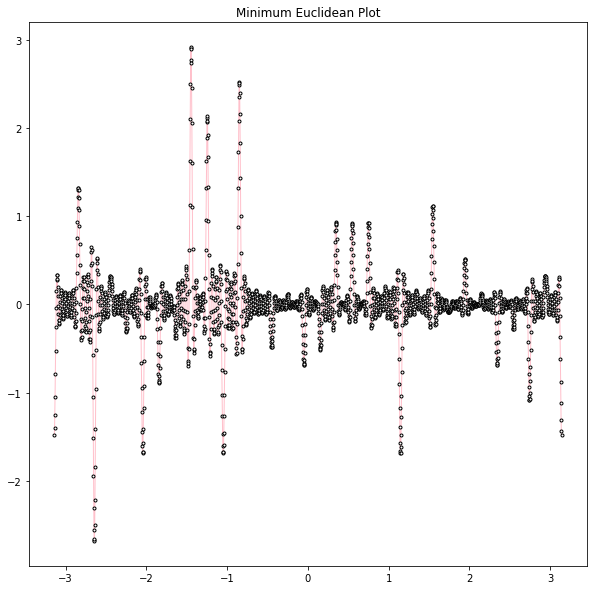

In [5]:
run_experiment_1a()

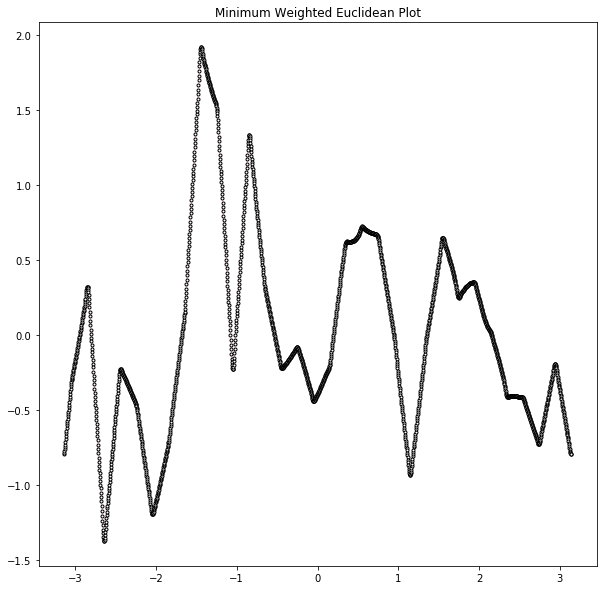

In [4]:
run_experiment_1b()